In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [118]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [119]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [121]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [122]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [123]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dropout(0.5))


In [124]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 8ms/step - loss: 0.4956 - accuracy: 0.1042 - val_loss: 0.0987 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.4063 - accuracy: 0.3338 - val_loss: 0.0443 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3935 - accuracy: 0.4052 - val_loss: 0.0399 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 2s 8ms/step - loss: 0.3871 - accuracy: 0.4402 - val_loss: 0.0314 - val_accuracy: 5.0000e-04
Epoch 5/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3871 - accuracy: 0.4480 - val_loss: 0.0216 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3917 - accuracy: 0.4522 - val_loss: 0.0331 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 2s 9ms/step - loss: 0.3829 - accuracy: 0.4308 - val_loss: 0.0160 - val

In [125]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.3799 - accuracy: 0.4342 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3761 - accuracy: 0.4583 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3781 - accuracy: 0.4555 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3825 - accuracy: 0.4503 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3851 - accuracy: 0.4590 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3875 - accuracy: 0.4610 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3767 - accuracy: 0.4655 - val_loss: 0.0101 - val_accuracy: 

In [126]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.3767 - accuracy: 0.4625 - val_loss: 0.0090 - val_accuracy: 0.0170
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3792 - accuracy: 0.4652 - val_loss: 0.0094 - val_accuracy: 0.0160
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3776 - accuracy: 0.4670 - val_loss: 0.0097 - val_accuracy: 0.0160
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3774 - accuracy: 0.4568 - val_loss: 0.0097 - val_accuracy: 0.0155
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3791 - accuracy: 0.4668 - val_loss: 0.0099 - val_accuracy: 0.0160
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3822 - accuracy: 0.4630 - val_loss: 0.0099 - val_accuracy: 0.0165
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3808 - accuracy: 0.4673 - val_loss: 0.0099 - val_accuracy: 0.0155
Epoch 

In [127]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.3768 - accuracy: 0.4582 - val_loss: 0.0098 - val_accuracy: 0.0135
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3828 - accuracy: 0.4603 - val_loss: 0.0098 - val_accuracy: 0.0135
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3825 - accuracy: 0.4682 - val_loss: 0.0097 - val_accuracy: 0.0140
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3856 - accuracy: 0.4643 - val_loss: 0.0093 - val_accuracy: 0.0155
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3815 - accuracy: 0.4585 - val_loss: 0.0094 - val_accuracy: 0.0145
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3827 - accuracy: 0.4552 - val_loss: 0.0095 - val_accuracy: 0.0150
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3788 - accuracy: 0.4695 - val_loss: 0.0096 - val_accuracy: 0.0140
Epoch 8/30
188/18

In [128]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.3876 - accuracy: 0.4702 - val_loss: 0.0160 - val_accuracy: 5.0000e-04
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3841 - accuracy: 0.4738 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3771 - accuracy: 0.4675 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3889 - accuracy: 0.4717 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3789 - accuracy: 0.4683 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3795 - accuracy: 0.4678 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3838 - accuracy: 0.4743 - val_loss: 0.0079 - val_accuracy: 

In [129]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.0000e+00
Test LSTM Loss:  0.008423767983913422
Test LSTM Accuracy:  0.0


In [170]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_model.predict(
    X_test_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test_lstm, lstm_classes)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  0.9995
Precision:  1.0
Recall:  0.9900990099009901
F1 score:  0.9950248756218906


In [187]:
metrics = ['Precision', 'Recall', 'F1-Score']


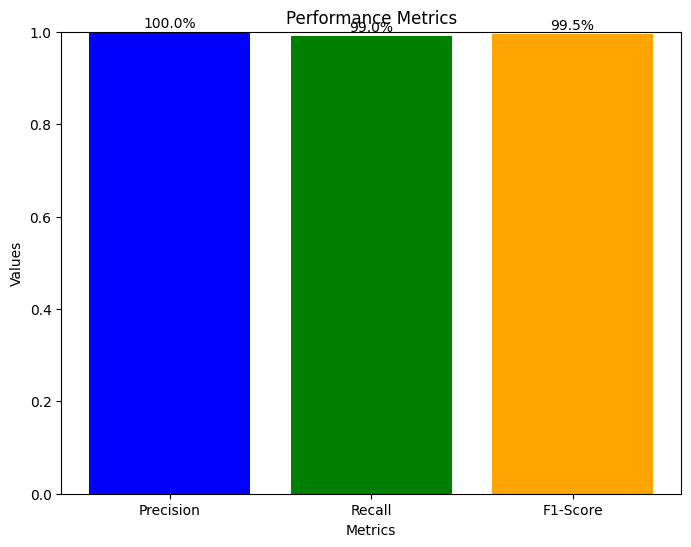

In [196]:
lstm_values = [lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=[
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim([0, 1])
plt.show()


In [131]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [132]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dropout(0.5))


In [133]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.6240 - accuracy: 0.0197 - val_loss: 0.1499 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.1134 - val_loss: 0.1294 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.2166 - val_loss: 0.1210 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.2636 - val_loss: 0.1165 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.2887 - val_loss: 0.1142 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.3117 - val_loss: 0.1127 - val_accuracy: 0.0000e+00
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.3496 - val_loss: 0.1096 - val

In [134]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 2s 3ms/step - loss: 0.4388 - accuracy: 0.4466 - val_loss: 0.1022 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.4429 - val_loss: 0.1011 - val_accuracy: 0.0173
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.4410 - val_loss: 0.1005 - val_accuracy: 0.0173
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.4411 - val_loss: 0.0990 - val_accuracy: 0.0027
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.4474 - val_loss: 0.0992 - val_accuracy: 0.0020
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.4421 - val_loss: 0.1016 - val_accuracy: 0.0013
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.4483 - val_loss: 0.0991 - val_accuracy: 6.6667e-04
Epoch 8/3

In [135]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 2s 3ms/step - loss: 0.4359 - accuracy: 0.4441 - val_loss: 0.1003 - val_accuracy: 6.6667e-04
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.4463 - val_loss: 0.1002 - val_accuracy: 6.6667e-04
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.4401 - val_loss: 0.1001 - val_accuracy: 6.6667e-04
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.4440 - val_loss: 0.1000 - val_accuracy: 6.6667e-04
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.4396 - val_loss: 0.1000 - val_accuracy: 6.6667e-04
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.4520 - val_loss: 0.1000 - val_accuracy: 6.6667e-04
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.4359 - val_loss: 0.0999 - val_accuracy: 

In [136]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.4569 - val_loss: 0.0998 - val_accuracy: 6.6667e-04
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.4569 - val_loss: 0.0998 - val_accuracy: 6.6667e-04
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.4470 - val_loss: 0.0998 - val_accuracy: 6.6667e-04
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.4503 - val_loss: 0.0998 - val_accuracy: 6.6667e-04
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.4584 - val_loss: 0.0998 - val_accuracy: 6.6667e-04
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.4556 - val_loss: 0.0998 - val_accuracy: 6.6667e-04
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.4514 - val_loss: 0.0998 - val_accuracy: 

In [137]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 2s 3ms/step - loss: 0.4362 - accuracy: 0.4409 - val_loss: 0.1015 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.4531 - val_loss: 0.1021 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.4363 - val_loss: 0.1021 - val_accuracy: 0.0000e+00
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.4434 - val_loss: 0.1015 - val_accuracy: 0.0013
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.4379 - val_loss: 0.1042 - val_accuracy: 0.0213
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.4427 - val_loss: 0.0991 - val_accuracy: 6.6667e-04
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.4434 - val_loss: 0.1009 - val_accuracy: 0.0027
E

In [138]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


 1/47 [..............................] - ETA: 0s - loss: 0.0123 - accuracy: 0.0000e+00

47/47 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 6.6667e-04
Test GRU Loss:  0.11208343505859375
Test GRU Accuracy:  0.0006666666595265269


In [195]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test_gru, gru_classes)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.958
Precision:  1.0
Recall:  0.1
F1 score:  0.18181818181818182


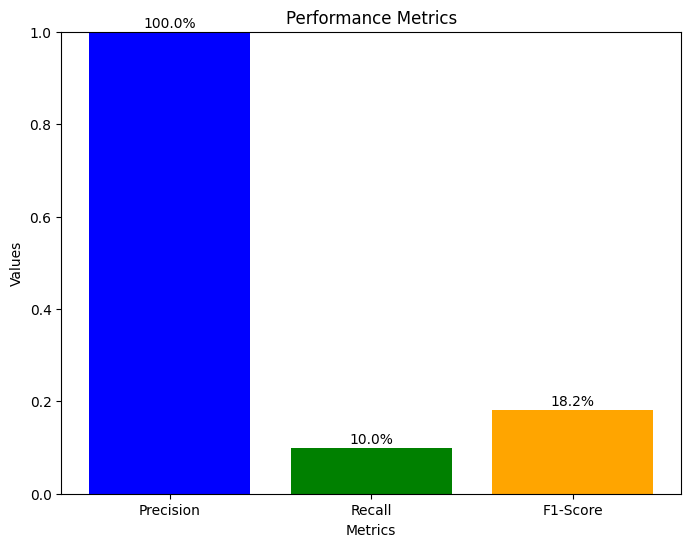

In [191]:
gru_values = [gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=[
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [140]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [141]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [142]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30


219/219 [==============================] - 1s 3ms/step - loss: 0.6138 - accuracy: 0.1810 - val_loss: 0.3556 - val_accuracy: 0.4433
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.6411 - val_loss: 0.3393 - val_accuracy: 0.7880
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.8369 - val_loss: 0.3336 - val_accuracy: 0.8620
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.8894 - val_loss: 0.3306 - val_accuracy: 0.9040
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.9120 - val_loss: 0.3284 - val_accuracy: 0.9180
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.9226 - val_loss: 0.3273 - val_accuracy: 0.9393
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.9293 - val_loss: 0.3245 - val_accuracy: 0.9273
Epoch 8/30
219/21

In [143]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5334 - accuracy: 0.9360 - val_loss: 0.2588 - val_accuracy: 0.9427
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.9414 - val_loss: 0.2609 - val_accuracy: 0.9527
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.9437 - val_loss: 0.2592 - val_accuracy: 0.9520
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.9447 - val_loss: 0.2604 - val_accuracy: 0.9553
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.9446 - val_loss: 0.2610 - val_accuracy: 0.9553
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.9460 - val_loss: 0.2621 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.9459 - val_loss: 0.2579 - val_accuracy: 0.9520
Epoch 

In [144]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30


219/219 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.9499 - val_loss: 0.2573 - val_accuracy: 0.9547
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.9499 - val_loss: 0.2572 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.9499 - val_loss: 0.2572 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.9497 - val_loss: 0.2572 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.9499 - val_loss: 0.2572 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.9499 - val_loss: 0.2571 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.9499 - val_loss: 0.2571 - val_accuracy: 0.9547
Epoch 8/30
219/21

In [145]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30


219/219 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.9487 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.9489 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.9489 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.9490 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.9490 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.9490 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.9491 - val_loss: 0.2570 - val_accuracy: 0.9547
Epoch 8/30
219/21

In [146]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30


219/219 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.9461 - val_loss: 0.2576 - val_accuracy: 0.9540
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.9471 - val_loss: 0.2589 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.9471 - val_loss: 0.2599 - val_accuracy: 0.9553
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5335 - accuracy: 0.9457 - val_loss: 0.2586 - val_accuracy: 0.9540
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.9463 - val_loss: 0.2624 - val_accuracy: 0.9560
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.9471 - val_loss: 0.2575 - val_accuracy: 0.9507
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.9474 - val_loss: 0.2583 - val_accuracy: 0.9547
Epoch 8/30
219/21

In [147]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


 1/47 [..............................] - ETA: 0s - loss: 2.1688e-04 - accuracy: 1.0000

47/47 [==============================] - 0s 2ms/step - loss: 0.2751 - accuracy: 0.9500
Test CNN Loss:  0.27512696385383606
Test CNN Accuracy:  0.949999988079071


In [172]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_model.predict(
    X_test_reshaped_cnn, verbose=0) > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes, zero_division=1)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes, zero_division=1)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test_cnn, cnn_classes, zero_division=1)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.9973333333333333
Precision:  1.0
Recall:  0.9428571428571428
F1 score:  0.9705882352941176


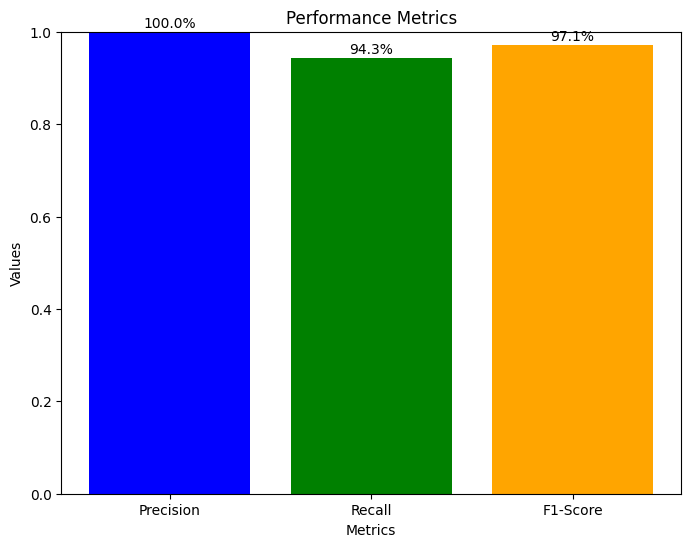

In [193]:
cnn_values = [cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=[
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


In [ ]:
# # ----- LSTM Adam Loss -----
# plt.plot(lstm_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(lstm_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Nadam Loss -----
# plt.plot(lstm_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(lstm_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Adgrad Loss -----
# plt.plot(lstm_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(lstm_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM SGD Loss -----
# plt.plot(lstm_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(lstm_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM RMSProp Loss -----
# plt.plot(lstm_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(lstm_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


# # plt.figure(figsize=(12, 6))

# # lstm_adam_h = np.mean(lstm_adam_history.history['loss'])
# # lstm_nadam_h = np.mean(lstm_nadam_history.history['loss'])
# # lstm_adagrad_h = np.mean(lstm_adagrad_history.history['loss'])
# # lstm_sgd_h = np.mean(lstm_sgd_history.history['loss'])
# # lstm_rms_h = np.mean(lstm_rms_history.history['loss'])


# # lstm_optimizers = [lstm_adam_h, lstm_nadam_h,
# #                    lstm_adagrad_h, lstm_sgd_h, lstm_rms_h]

# # plt.plot(lstm_optimizers, label="Loss", color='blue')
# # # plt.plot(lstm_optimizers, label="Validation Loss", color='lightblue')

# # plt.title("Training and Validation loss in LSTM")
# # plt.xlabel("Epoch")
# # plt.ylabel("Loss")
# # plt.legend()
# # plt.grid(True)
# # plt.show()


In [153]:
# # ----- LSTM Adam Accuracy -----
# plt.plot(lstm_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(lstm_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Nadam Accuracy -----
# plt.plot(lstm_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(lstm_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM Adgrad Accuracy -----
# plt.plot(lstm_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(lstm_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM SGD Accuracy -----
# plt.plot(lstm_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(lstm_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- LSTM RMSProp Accuracy -----
# plt.plot(lstm_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(lstm_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [154]:
# # ----- GRU Adam Loss -----
# plt.plot(gru_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(gru_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Nadam Loss -----
# plt.plot(gru_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(gru_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Adgrad Loss -----
# plt.plot(gru_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(gru_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU SGD Loss -----
# plt.plot(gru_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(gru_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU RMSProp Loss -----
# plt.plot(gru_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(gru_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in GRU using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [155]:
# # ----- GRU Adam Accuracy -----
# plt.plot(gru_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(gru_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Nadam Accuracy -----
# plt.plot(gru_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(gru_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU Adgrad Accuracy -----
# plt.plot(gru_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(gru_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU SGD Accuracy -----
# plt.plot(gru_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(gru_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- GRU RMSProp Accuracy -----
# plt.plot(gru_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(gru_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in GRU using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [156]:
# # ----- CNN1D Adam Loss -----
# plt.plot(cnn_adam_history.history['loss'],
#          label="Adam Training Loss", color='blue')
# plt.plot(cnn_adam_history.history['val_loss'],
#          label="Adam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D Nadam Loss -----
# plt.plot(cnn_nadam_history.history['loss'],
#          label="Nadam Training Loss", color='blue')
# plt.plot(cnn_nadam_history.history['val_loss'],
#          label="Nadam Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D Adgrad Loss -----
# plt.plot(cnn_adagrad_history.history['loss'],
#          label="Adagrad Training Loss", color='blue')
# plt.plot(cnn_adagrad_history.history['val_loss'],
#          label="Adagrad Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D SGD Loss -----
# plt.plot(cnn_sgd_history.history['loss'],
#          label="SGD Training Loss", color='blue')
# plt.plot(cnn_sgd_history.history['val_loss'],
#          label="SGD Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1D RMSProp Loss -----
# plt.plot(cnn_rms_history.history['loss'],
#          label="RMS Training Loss", color='blue')
# plt.plot(cnn_rms_history.history['val_loss'],
#          label="RMS Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [157]:
# # ----- CNN1d Adam Accuracy -----
# plt.plot(cnn_adam_history.history['accuracy'],
#          label="Adam Training Accuracy", color='blue')
# plt.plot(cnn_adam_history.history['val_accuracy'],
#          label="Adam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d Nadam Accuracy -----
# plt.plot(cnn_nadam_history.history['accuracy'],
#          label="Nadam Training Accuracy", color='blue')
# plt.plot(cnn_nadam_history.history['val_accuracy'],
#          label="Nadam Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d Adgrad Accuracy -----
# plt.plot(cnn_adagrad_history.history['accuracy'],
#          label="Adagrad Training Accuracy", color='blue')
# plt.plot(cnn_adagrad_history.history['val_accuracy'],
#          label="Adagrad Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d SGD Accuracy -----
# plt.plot(cnn_sgd_history.history['accuracy'],
#          label="SGD Training Accuracy", color='blue')
# plt.plot(cnn_sgd_history.history['val_accuracy'],
#          label="SGD Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()

# # ----- CNN1d RMSProp Accuracy -----
# plt.plot(cnn_rms_history.history['accuracy'],
#          label="RMS Training Accuracy", color='blue')
# plt.plot(cnn_rms_history.history['val_accuracy'],
#          label="RMS Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [158]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [159]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [160]:
models = ['LSTM', 'GRU', '1D-CNN']


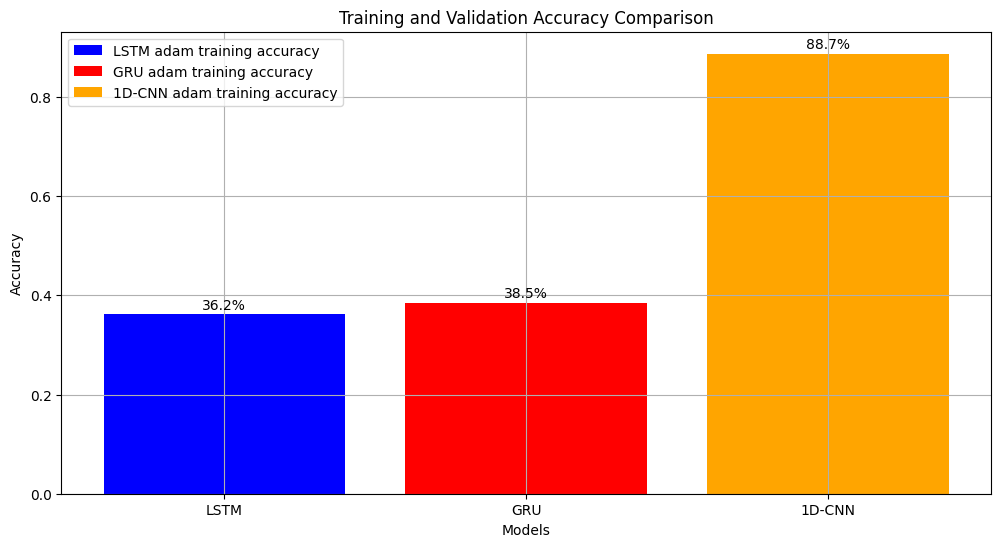

In [197]:
plt.figure(figsize=(12, 6))

lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = lstm_adam_history.history["val_accuracy"]

gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = gru_adam_history.history["val_accuracy"]

cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = cnn_adam_history.history["val_accuracy"]

adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title("Training and Validation Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


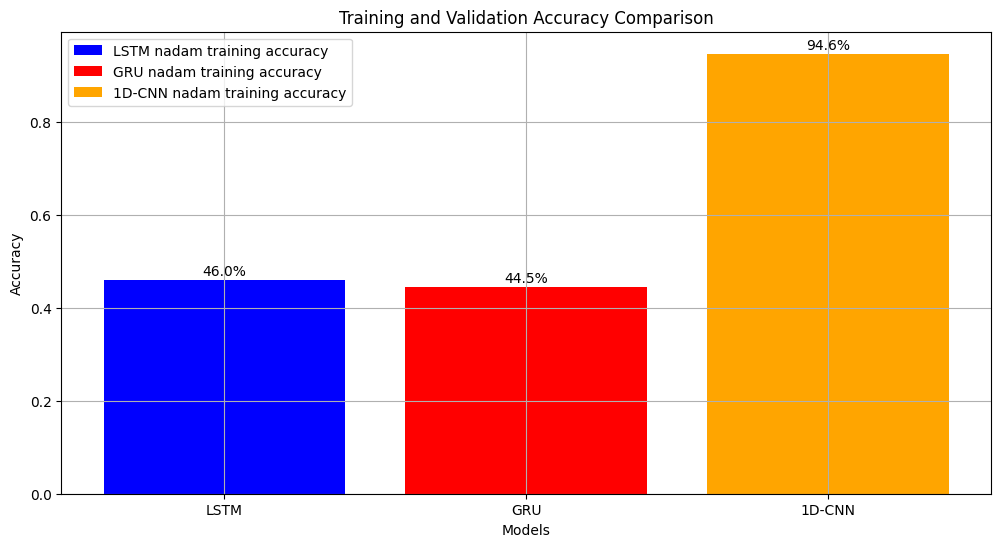

In [162]:
plt.figure(figsize=(12, 6))

lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

nadam_accuracies = [lstm_nadam_train_acc,
                    gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


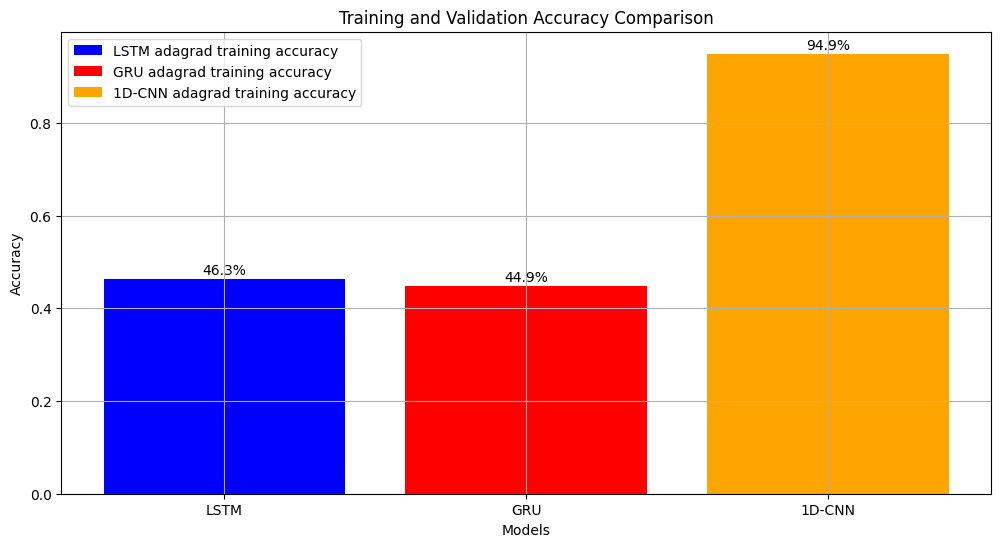

In [163]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_adagrad_history.history["accuracy"],
#          label="LSTM adagrad training accuracy", color='blue')
# plt.plot(lstm_adagrad_history.history["val_accuracy"],
#          label="LSTM adagrad validation accuracy", color='lightblue')

# plt.plot(gru_adagrad_history.history["accuracy"],
#          label="GRU adagrad training accuracy", color='green')
# plt.plot(gru_adagrad_history.history["val_accuracy"],
#          label="GRU adagrad validation accuracy", color='lightgreen')

# plt.plot(cnn_adagrad_history.history["accuracy"],
#          label="CNN adagrad training accuracy", color='orange')
# plt.plot(cnn_adagrad_history.history["val_accuracy"],
#          label="CNN adagrad validation accuracy", color='gold')

lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# plt.bar(epochs, lstm_adagrad_train_acc, width=bar_width,
#         label="LSTM adagrad training accuracy", color='blue')

# plt.bar([e + 1 * bar_width for e in epochs], gru_adagrad_train_acc,
#         width=bar_width, label="GRU adagrad training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_adagrad_train_acc,
#         width=bar_width, label="CNN adagrad training accuracy", color='orange')

adagrad_accuracies = [lstm_adagrad_train_acc,
                      gru_adagrad_train_acc, cnn_adagrad_train_acc]
adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


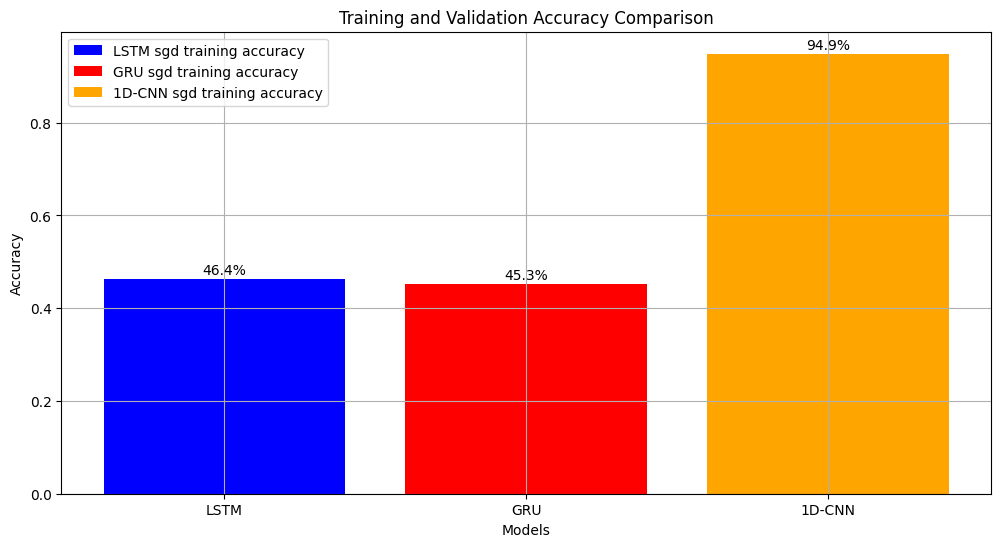

In [164]:
plt.figure(figsize=(12, 6))

lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

sgd_accuracies = [lstm_sgd_train_acc,
                  gru_sgd_train_acc, cnn_sgd_train_acc]
sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


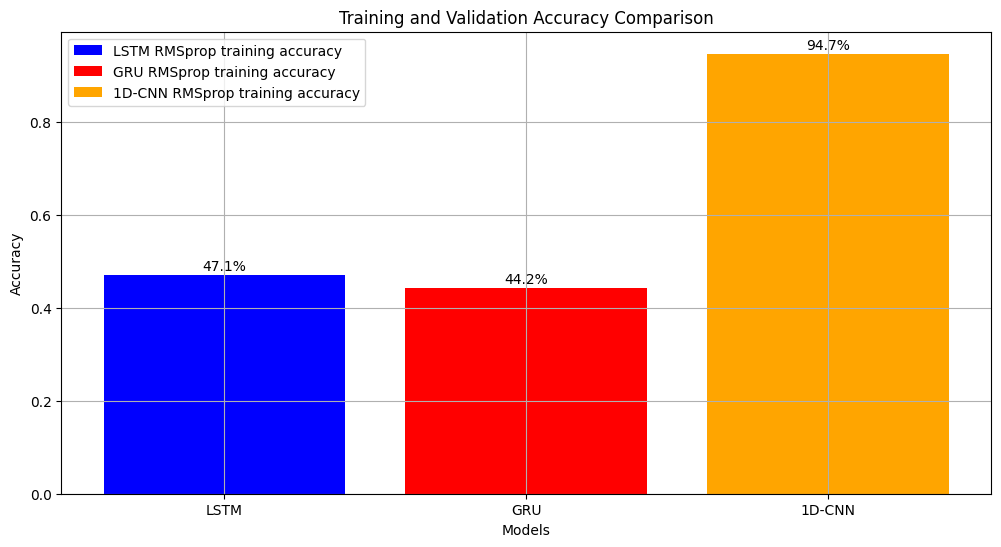

In [165]:
plt.figure(figsize=(12, 6))

lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


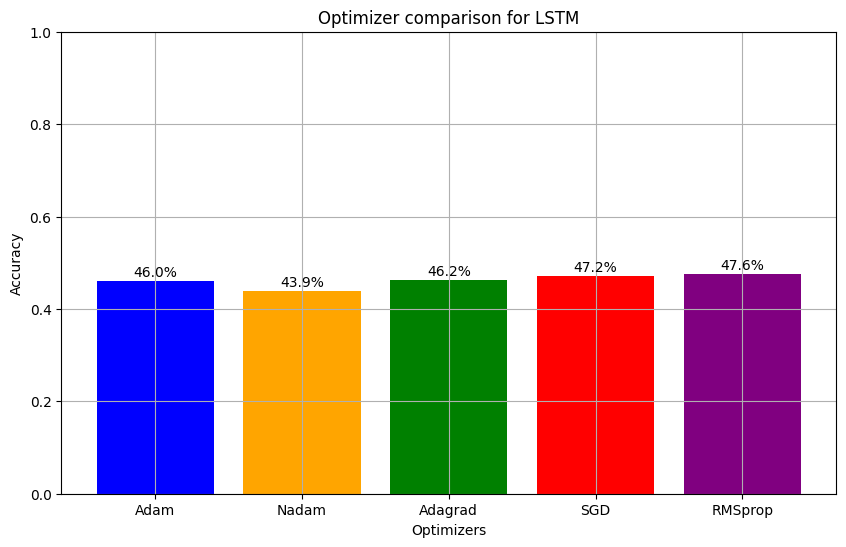

In [166]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))
# for optimizer, history in zip(optimizers, lstm_histories):
#     plt.plot(history.history['accuracy'], label=optimizer)

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()


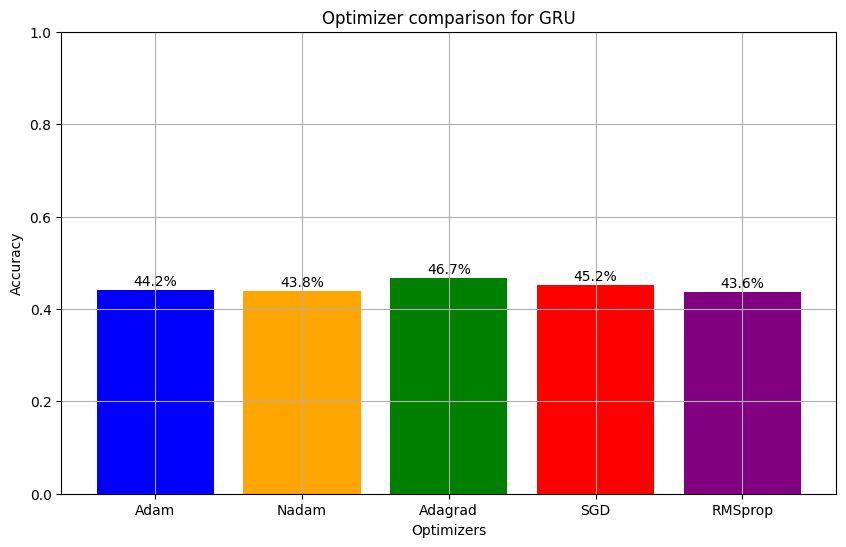

In [167]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()


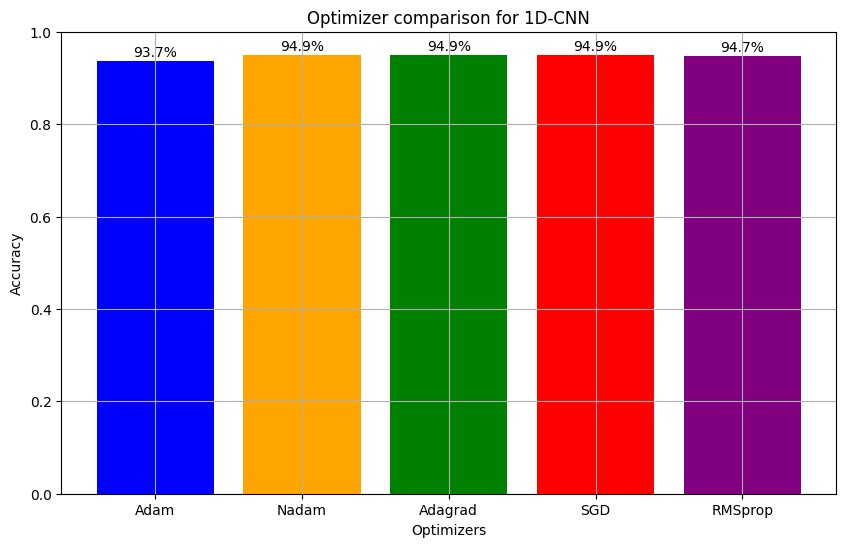

In [168]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val +
             0.01, f'{y_val*100:.1f}%', ha='center')

plt.show()
